In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as st

In [2]:
home_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,124547.031380,122338.760387,120284.544997,118569.499840,117733.766672,117811.796274,119242.025068,1.208697e+05,1.218988e+05,1.220752e+05
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,430162.304681,426865.266476,423965.648960,423457.606149,423400.547313,425166.352814,426865.782342,4.281101e+05,4.280975e+05,4.271596e+05
892,753874,937,"Craig, CO",msa,CO,101001.116743,101274.030329,101761.396853,102460.850065,103259.396103,...,291672.198531,292412.687064,292344.802219,291552.668152,291483.099905,291958.734641,292753.813872,2.936681e+05,2.940164e+05,2.943587e+05
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,97651.281511,96117.960519,94767.283797,94062.082438,94161.423281,94877.489624,95666.336569,9.634301e+04,9.659689e+04,9.634983e+04


In [3]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
temp_index_df = pd.read_csv('../Source/Metro_market_temp_index.csv')

In [4]:
rental_df.at[0, "StateName"] = "USA"
rental_df = rental_df.dropna(how = 'any')

In [5]:
# Separate the first row
first_row = rental_df.iloc[[0]]  # Keep it as a DataFrame
remaining_rows = rental_df.iloc[1:]  # Get the rest of the DataFrame

# Sort the remaining rows alphabetically by the 'Name' column
sorted_remaining = remaining_rows.sort_values(by='RegionName')

# Concatenate the first row with the sorted remaining rows
rental_df = pd.concat([first_row, sorted_remaining], ignore_index=True)

In [6]:
temp_index_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,49.0,50.0,52.0,54.0,54.0,...,55.0,53.0,55.0,59.0,62.0,62.0,61.0,58.0,56.0,54.0
1,394913,1,"New York, NY",msa,NY,50.0,51.0,55.0,57.0,55.0,...,67.0,65.0,74.0,84.0,91.0,88.0,85.0,79.0,76.0,74.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,66.0,...,72.0,72.0,77.0,81.0,84.0,82.0,80.0,74.0,69.0,67.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,51.0,...,60.0,58.0,62.0,68.0,74.0,77.0,75.0,71.0,67.0,64.0
4,394514,4,"Dallas, TX",msa,TX,56.0,56.0,58.0,60.0,60.0,...,56.0,57.0,61.0,65.0,66.0,66.0,63.0,59.0,55.0,52.0


## How have rental prices increased over time compared to housing prices?

In [7]:
# filter home_df to 2015 onward to match rental data
# Get all columns names
columns = home_df.columns

# Extract date columns starting from the 6th column (index 5)
date_columns = columns[5:]

# Convert the column names to datetime format and filter based on the date
date_columns = pd.to_datetime(date_columns, errors='coerce')
date_columns = date_columns[date_columns >= pd.Timestamp('2015-01-01')]

# Get the names of the columns to keep
filtered_date_columns = date_columns.strftime('%Y-%m-%d')

# Combine with non-date columns
non_date_columns = columns[:5]
all_columns_to_keep = list(non_date_columns) + list(filtered_date_columns)

# Filter the DataFrame
filtered_home_df = home_df[all_columns_to_keep]

In [8]:
filtered_home_df.at[0, "StateName"] = "USA"
filtered_home_df = filtered_home_df.dropna(how = 'any')

In [9]:
# Separate the first row
first_row_home = filtered_home_df.iloc[[0]]  # Keep it as a DataFrame
remaining_rows_home = filtered_home_df.iloc[1:]  # Get the rest of the DataFrame

# Sort the remaining rows alphabetically by the 'Name' column
sorted_remaining_home = remaining_rows_home.sort_values(by='RegionName')

# Concatenate the first row with the sorted remaining rows
filtered_home_df = pd.concat([first_row_home, sorted_remaining_home], ignore_index=True)

In [10]:
filtered_home_df = filtered_home_df[filtered_home_df['RegionName'].isin(rental_df['RegionName'])]
filtered_home_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191786.127597,191428.675549,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,212905.984641,213580.435519,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,322092.923506,322925.400505,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,330861.314859,332237.417182,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,395224,94,"Wichita, KS",msa,KS,117721.189468,118083.756804,118456.731311,118999.567389,119546.443461,...,209400.448001,208981.193775,208421.450760,208529.794302,209585.274829,211453.275082,213633.844053,215673.526991,217512.373885,219134.559742
827,395229,174,"Wilmington, NC",msa,NC,211817.752815,212811.401542,213444.455419,214208.522948,214961.523695,...,424980.621106,426383.478188,427655.793873,428944.866043,430589.593659,432725.583449,435016.920555,436696.934007,437291.154871,437207.706025
830,395232,308,"Winchester, VA",msa,VA,207509.272554,207975.940007,208399.075099,209182.016892,210457.098246,...,359156.002301,360242.104115,360988.309974,361253.746904,362017.071842,363361.805365,365464.668450,367194.591654,368181.557678,368833.563357
832,395235,89,"Winston, NC",msa,NC,138393.777698,138600.068853,138720.207387,139032.324674,139510.495404,...,263833.313382,265056.614683,265494.158936,265483.263838,265428.729674,266494.517692,268625.031961,271155.824004,273128.134192,274359.496842


In [11]:
rental_df = rental_df[rental_df['RegionName'].isin(filtered_home_df['RegionName'])]
rental_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,USA,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394299,251,"Abilene, TX",msa,TX,975.342756,976.731022,972.594031,976.605687,990.087656,...,1484.883899,1477.258948,1460.553702,1464.349388,1465.173211,1489.057823,1521.466343,1535.699422,1541.539681,1534.302611
2,394304,83,"Akron, OH",msa,OH,799.963745,799.444330,794.695413,809.017360,810.941579,...,1291.722731,1291.077986,1299.707092,1313.416939,1324.198885,1312.175436,1318.633294,1322.399550,1344.870012,1358.396907
3,394308,64,"Albany, NY",msa,NY,1394.809405,1424.351695,1433.907926,1437.900711,1438.200996,...,2154.583800,2196.431549,2196.525040,2286.016091,2258.880520,2287.928469,2236.977051,2297.179644,2312.802631,2326.492685
4,394312,62,"Albuquerque, NM",msa,NM,1122.820680,1125.679974,1137.171708,1143.781134,1149.529923,...,1998.509212,2005.984398,2018.085217,2016.503414,2013.389959,2012.501254,2040.708325,2056.063908,2067.411738,2060.090464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,395224,94,"Wichita, KS",msa,KS,830.828777,833.812938,834.697742,837.476562,841.383908,...,1191.786817,1189.114460,1188.897167,1191.043563,1202.146225,1211.276449,1220.356425,1225.152641,1230.152951,1236.681936
166,395229,174,"Wilmington, NC",msa,NC,1142.946730,1158.613971,1160.863373,1167.871567,1169.811053,...,2170.665881,2173.497063,2148.993860,2187.565833,2182.133306,2196.369034,2202.992996,2213.285169,2230.668941,2232.270824
167,395232,308,"Winchester, VA",msa,VA,1115.817773,1124.179104,1137.187965,1142.106173,1135.716701,...,1871.729871,1882.127954,1893.753373,1914.859912,1905.489262,1944.591022,1946.522479,1990.504255,1972.061571,2014.430303
168,395235,89,"Winston, NC",msa,NC,1026.931416,1032.106627,1034.074270,1037.662147,1046.626613,...,1793.745762,1793.082498,1799.028017,1809.601899,1829.233122,1851.433029,1859.167909,1856.748048,1864.307159,1864.243934


In [12]:
# select only dates and prices for the US
just_years_home = filtered_home_df[filtered_home_df.columns[5:]]
home_first_row = just_years_home.iloc[0]
home_first_row = pd.DataFrame(home_first_row)
home_first_row

,0
2015-01-31,188211.155261
2015-02-28,189021.319587
2015-03-31,189847.798856
2015-04-30,190756.066067
2015-05-31,191755.432776
...,...
2024-03-31,360011.602927
2024-04-30,361969.362164
2024-05-31,363503.321866
2024-06-30,364165.906995


In [13]:
# do the same for rentals
just_years_rental = rental_df[rental_df.columns[5:]]
rental_first_row = just_years_rental.iloc[0]
rental_first_row

2015-01-31    1310.862067
2015-02-28    1317.635432
2015-03-31    1326.592064
2015-04-30    1337.166174
2015-05-31    1347.094223
                 ...     
2024-03-31    2249.433872
2024-04-30    2262.554936
2024-05-31    2275.422072
2024-06-30    2285.166408
2024-07-31    2294.365189
Name: 0, Length: 115, dtype: float64

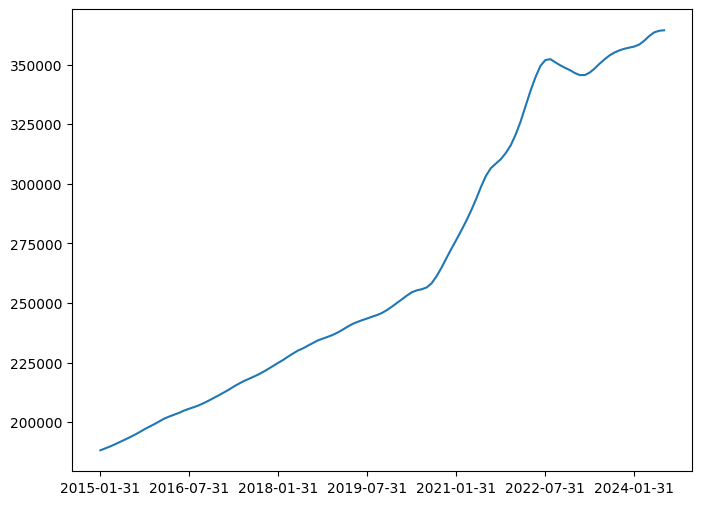

0.9360425798603323


In [14]:
 # plot the relationships 
plt.figure(figsize=(8, 6)) 
plt.plot(home_first_row) 
n = 18  # Set the interval for showing x-tick labels
plt.xticks(range(0, len(home_first_row.index), n), home_first_row.index[::n])
plt.savefig("../IMAGES/home_US.png")
plt.show()
print((364384.810590 - 188211.155261)/188211.155261)

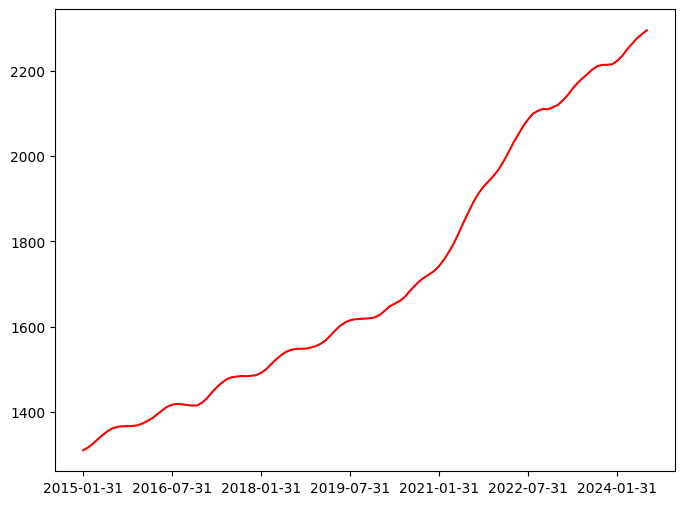

0.7502720131728399


In [15]:
plt.figure(figsize=(8, 6))
plt.plot(rental_first_row, color = 'red')
n = 18  # Set the interval for showing x-tick labels
plt.xticks(range(0, len(rental_first_row.index), n), rental_first_row.index[::n])
plt.savefig("../IMAGES/rental_US.png")
plt.show()
print((2294.365189 - 1310.862067)/ 1310.862067)

In [16]:
filtered_home_df.loc[:, ["RegionName", "RegionType", "StateName"]] = filtered_home_df[["RegionName", "RegionType", "StateName"]].astype(str)

In [17]:
print(filtered_home_df.dtypes)

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
2024-07-31    float64
Length: 120, dtype: object


In [18]:
percent_change = []
for index, row in filtered_home_df.iterrows():
    change = ((row['2024-07-31'] - row['2015-01-31']) / row['2015-01-31'])*100
    percent_change.append(change)

In [19]:
rental_percent_change = []
for index, row in rental_df.iterrows():
    rental_change = ((row['2024-07-31'] - row['2015-01-31']) / row['2015-01-31'])*100
    rental_percent_change.append(rental_change)

In [20]:
filtered_home_df["housingPercentChange"] = percent_change

In [21]:
filtered_home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590,93.604258
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191428.675549,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983,66.866292
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,213580.435519,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257,86.360315
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,322925.400505,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133,67.148181
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,332237.417182,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076,96.915940


In [22]:
rental_df["rentalPercentChange"] = rental_percent_change
rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,rentalPercentChange
0,102001,0,United States,country,USA,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189,75.027201
1,394299,251,"Abilene, TX",msa,TX,975.342756,976.731022,972.594031,976.605687,990.087656,...,1477.258948,1460.553702,1464.349388,1465.173211,1489.057823,1521.466343,1535.699422,1541.539681,1534.302611,57.309069
2,394304,83,"Akron, OH",msa,OH,799.963745,799.444330,794.695413,809.017360,810.941579,...,1291.077986,1299.707092,1313.416939,1324.198885,1312.175436,1318.633294,1322.399550,1344.870012,1358.396907,69.807309
3,394308,64,"Albany, NY",msa,NY,1394.809405,1424.351695,1433.907926,1437.900711,1438.200996,...,2196.431549,2196.525040,2286.016091,2258.880520,2287.928469,2236.977051,2297.179644,2312.802631,2326.492685,66.796458
4,394312,62,"Albuquerque, NM",msa,NM,1122.820680,1125.679974,1137.171708,1143.781134,1149.529923,...,2005.984398,2018.085217,2016.503414,2013.389959,2012.501254,2040.708325,2056.063908,2067.411738,2060.090464,83.474574


In [24]:
# Try exporting to JSON
filtered_home_df.to_json('filtered_home_df.json', orient='records', indent=4)

In [25]:
# export rental dataframe to json
rental_df.to_json('rental_df.json', orient='records', indent=4)

## Create heat maps to analyze prices by location

In [26]:
home_heat_df = filtered_home_df[["RegionName", "2024-07-31"]]
home_heat_df.head()

,RegionName,2024-07-31
0,United States,364384.810590
3,"Abilene, TX",194900.821983
6,"Akron, OH",223822.771257
8,"Albany, NY",338039.246133
12,"Albuquerque, NM",340734.171076


In [27]:
rental_heat_df = rental_df[["RegionName", "2024-07-31"]]
rental_heat_df.head()

,RegionName,2024-07-31
0,United States,2294.365189
1,"Abilene, TX",1534.302611
2,"Akron, OH",1358.396907
3,"Albany, NY",2326.492685
4,"Albuquerque, NM",2060.090464


## bring in the cities dataset for latitude, longitude, and additional data

In [28]:
cities_df = pd.read_csv('../Source/uscities.csv')

In [29]:
cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [30]:
cities_df_simple = cities_df[["city", "state_id", "lat", "lng"]]
cities_df_simple.head()

,city,state_id,lat,lng
0,New York,NY,40.6943,-73.9249
1,Los Angeles,CA,34.1141,-118.4068
2,Chicago,IL,41.8375,-87.6866
3,Miami,FL,25.7840,-80.2101
4,Houston,TX,29.7860,-95.3885


In [31]:
cities_df_simple['RegionName'] = cities_df_simple['city'].astype(str) + ', ' + cities_df_simple['state_id'].astype(str)

/var/folders/tn/g6qz3f296z7cn5d90mgpvj600000gn/T/ipykernel_59181/2841874249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df_simple['RegionName'] = cities_df_simple['city'].astype(str) + ', ' + cities_df_simple['state_id'].astype(str)


In [32]:
cities_df_simple.head()

,city,state_id,lat,lng,RegionName
0,New York,NY,40.6943,-73.9249,"New York, NY"
1,Los Angeles,CA,34.1141,-118.4068,"Los Angeles, CA"
2,Chicago,IL,41.8375,-87.6866,"Chicago, IL"
3,Miami,FL,25.7840,-80.2101,"Miami, FL"
4,Houston,TX,29.7860,-95.3885,"Houston, TX"


In [33]:
# add latitude and longitude to rental_heat_df
rental_heat_df = pd.merge(rental_heat_df, cities_df_simple, on = 'RegionName', how = 'inner')
rental_heat_df.head()

,RegionName,2024-07-31,city,state_id,lat,lng
0,"Abilene, TX",1534.302611,Abilene,TX,32.4543,-99.7384
1,"Akron, OH",1358.396907,Akron,OH,41.0798,-81.5219
2,"Albany, NY",2326.492685,Albany,NY,42.6664,-73.7987
3,"Albuquerque, NM",2060.090464,Albuquerque,NM,35.1054,-106.6465
4,"Allentown, PA",2130.268164,Allentown,PA,40.5961,-75.4756


In [34]:
# remove extra columns
rental_heat_df = rental_heat_df[['RegionName', 'lat', 'lng', '2024-07-31']]
rental_heat_df.rename(columns={'2024-07-31': 'price'}, inplace=True)
rental_heat_df.head()

,RegionName,lat,lng,price
0,"Abilene, TX",32.4543,-99.7384,1534.302611
1,"Akron, OH",41.0798,-81.5219,1358.396907
2,"Albany, NY",42.6664,-73.7987,2326.492685
3,"Albuquerque, NM",35.1054,-106.6465,2060.090464
4,"Allentown, PA",40.5961,-75.4756,2130.268164


In [35]:
# add latitude and longitude to home_heat_df
home_heat_df = pd.merge(home_heat_df, cities_df_simple, on = 'RegionName', how = 'inner')
home_heat_df.head()

,RegionName,2024-07-31,city,state_id,lat,lng
0,"Abilene, TX",194900.821983,Abilene,TX,32.4543,-99.7384
1,"Akron, OH",223822.771257,Akron,OH,41.0798,-81.5219
2,"Albany, NY",338039.246133,Albany,NY,42.6664,-73.7987
3,"Albuquerque, NM",340734.171076,Albuquerque,NM,35.1054,-106.6465
4,"Allentown, PA",337281.004379,Allentown,PA,40.5961,-75.4756


In [36]:
# remove unnecessary columns
home_heat_df = home_heat_df[['RegionName', 'lat', 'lng', '2024-07-31']]
home_heat_df.rename(columns={'2024-07-31': 'price'}, inplace=True)
home_heat_df.head()

,RegionName,lat,lng,price
0,"Abilene, TX",32.4543,-99.7384,194900.821983
1,"Akron, OH",41.0798,-81.5219,223822.771257
2,"Albany, NY",42.6664,-73.7987,338039.246133
3,"Albuquerque, NM",35.1054,-106.6465,340734.171076
4,"Allentown, PA",40.5961,-75.4756,337281.004379


In [37]:
home_heat_df.to_json('home_heat_df.json', orient='records', indent=4)

In [38]:
rental_heat_df.to_json('rental_heat_df.json', orient='records', indent=4)

In [39]:
rental_heat_df.dtypes

RegionName     object
lat           float64
lng           float64
price         float64
dtype: object

In [40]:
home_heat_df["price"].mean()

392514.46941738063

In [41]:
rental_heat_df["price"].mean()

2180.949736272311

In [57]:
difference = filtered_home_df["housingPercentChange"].values - rental_df["rentalPercentChange"].values
print(difference)

[ 18.57705668   9.55722268  16.55300658   0.35172265  13.44136567
  10.54306305   1.8106634   15.26302866   9.49216929  30.36359001
 -47.36769226  14.53679826  30.34838541  19.54948423   5.22790363
   3.23104333 -15.42249354  17.35785759  47.39282504  20.68993579
  31.24861844  21.51658576 -22.05358995  17.97203866   7.53700605
 -15.75612102  10.72449138  44.09629314 -10.60095143  15.23383126
   8.86174611  12.92048852  14.68911103  19.72281907  21.5958674
  21.06154056  18.79454584   7.48776658  14.92391256   5.29314154
  30.57564117  16.947904     7.58099951  44.50178061  -2.46223685
  35.49417009  30.56076071  32.10212943  35.44846225  19.17085428
  17.95255143  43.0585436    3.86160565  32.88245793  12.37990858
  24.41003543  18.91185191  19.43319844  13.27501784  18.27735178
   6.16932165  23.07951919   9.70330539   8.74564998   6.27096356
   0.94259963   5.33460875  32.01338722  -4.13030965  32.98539096
  36.34818234  23.11767758  32.31838626  26.9829413   29.07271337
  24.867958

In [58]:
filtered_home_df["discrepancy"] = difference
filtered_home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,housingPercentChange,discrepancy
0,102001,0,United States,country,USA,188211.155261,189021.319587,189847.798856,190756.066067,191755.432776,...,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,363503.321866,364165.906995,364384.810590,93.604258,18.577057
3,394299,251,"Abilene, TX",msa,TX,116800.595050,117081.811975,117607.011253,118188.855822,118650.044099,...,191104.713083,191168.646556,191895.586212,193224.785314,194664.910874,195355.061992,195459.366448,194900.821983,66.866292,9.557223
6,394304,83,"Akron, OH",msa,OH,120102.163828,120101.111310,120096.438119,120548.211980,121246.090732,...,214016.228955,214378.717565,215226.845932,216930.776064,219253.225285,221406.478855,222904.047999,223822.771257,86.360315,16.553007
8,394308,64,"Albany, NY",msa,NY,202239.261415,202746.238898,203199.328919,203607.285462,204017.138617,...,323988.027020,325163.552854,326799.002703,328968.874016,331765.306711,334428.769717,336441.346141,338039.246133,67.148181,0.351723
12,394312,62,"Albuquerque, NM",msa,NM,173035.342285,173603.094282,174285.048982,175055.558200,175507.486038,...,333351.629180,334461.994196,335570.283667,337338.946222,339196.998140,340541.588924,340771.315083,340734.171076,96.915940,13.441366


In [59]:
# make a dataframe with just cities and percent differences
discrepancy_df = filtered_home_df[['RegionName', 'discrepancy']]
discrepancy_df.head()

,RegionName,discrepancy
0,United States,18.577057
3,"Abilene, TX",9.557223
6,"Akron, OH",16.553007
8,"Albany, NY",0.351723
12,"Albuquerque, NM",13.441366


In [60]:
# all cities with differences between rental prices and home values
discrepancy_df.sort_values(by = 'discrepancy', ascending = True)

,RegionName,discrepancy
43,"Atlantic City, NJ",-47.367692
107,"Bridgeport, CT",-22.053590
544,"New Orleans, LA",-21.828720
426,"Lawton, OK",-21.814231
711,"Shreveport, LA",-17.220950
...,...,...
190,"Dallas, TX",44.501781
693,"Seattle, WA",46.884857
94,"Boise City, ID",47.392825
413,"Lakeland, FL",53.513108


In [91]:
# dataframe for % change in home values
home_percents = filtered_home_df[["RegionName", "housingPercentChange"]]
home_percents = pd.merge(home_percents, cities_df_simple, on = 'RegionName', how = 'inner')
home_percents = home_percents[["RegionName", "lat", "lng", "housingPercentChange"]]
home_percents.rename(columns={'housingPercentChange': 'price'}, inplace=True)
# show top 5
home_top_5 = home_percents.sort_values(by = 'price', ascending = False).head()
home_top_5

,RegionName,lat,lng,price
118,"Port St. Lucie, FL",27.2796,-80.3884,157.291860
147,"Tampa, FL",27.9945,-82.4447,142.769287
113,"Palm Bay, FL",27.9631,-80.6593,142.273392
142,"Spokane, WA",47.6671,-117.4330,140.904842
106,"Ocala, FL",29.1780,-82.1511,140.582959


In [86]:
# dataframe for % change in rental prices
rental_percents = rental_df[["RegionName", "rentalPercentChange"]]
rental_percents = pd.merge(rental_percents, cities_df_simple, on = 'RegionName', how = 'inner')
rental_percents = rental_percents[["RegionName", "lat", "lng", "rentalPercentChange"]]
# show top 5
rental_top_5 = rental_percents.sort_values(by = 'rentalPercentChange', ascending = False).head()
rental_top_5

,RegionName,lat,lng,rentalPercentChange
139,"Sebastian, FL",27.7822,-80.4819,143.209112
9,"Atlantic City, NJ",39.3797,-74.4527,128.489419
98,"Naples, FL",26.1504,-81.7936,125.974920
7,"Athens, GA",33.9508,-83.3689,116.515577
118,"Port St. Lucie, FL",27.2796,-80.3884,113.274626


In [87]:
# show bottom 5 home price changes
home_bottom_5 = home_top_5 = home_percents.sort_values(by = 'housingPercentChange', ascending = False).tail()
home_bottom_5

,RegionName,lat,lng,housingPercentChange
42,"Davenport, IA",41.5565,-90.6053,40.499311
14,"Baton Rouge, LA",30.4420,-91.1311,38.194246
79,"Lawton, OK",34.6175,-98.4202,30.750566
101,"New Orleans, LA",30.0687,-89.9288,22.894946
140,"Shreveport, LA",32.4653,-93.7955,15.520892


In [88]:
# show bottom 5 rental price changes
rental_bottom_5 = rental_percents.sort_values(by = 'rentalPercentChange', ascending = False).tail()
rental_bottom_5

,RegionName,lat,lng,rentalPercentChange
84,"Lubbock, TX",33.5657,-101.8879,41.985131
39,"Corpus Christi, TX",27.7254,-97.3767,36.818134
14,"Baton Rouge, LA",30.4420,-91.1311,34.963203
140,"Shreveport, LA",32.4653,-93.7955,32.741843
87,"Manhattan, KS",39.1886,-96.6048,26.257824


In [89]:
# save them to json for additional maps
home_percents.to_json('home_percents.json', orient='records', indent=4)
rental_percents.to_json('rental_percents.json', orient='records', indent=4)

In [73]:
merged_df = pd.merge(home_percents, rental_percents, on = 'RegionName')
merged_df.head()

,RegionName,housingPercentChange,rentalPercentChange
0,United States,93.604258,75.027201
1,"Abilene, TX",66.866292,57.309069
2,"Akron, OH",86.360315,69.807309
3,"Albany, NY",67.148181,66.796458
4,"Albuquerque, NM",96.915940,83.474574


The correlation between both factors is 0.79


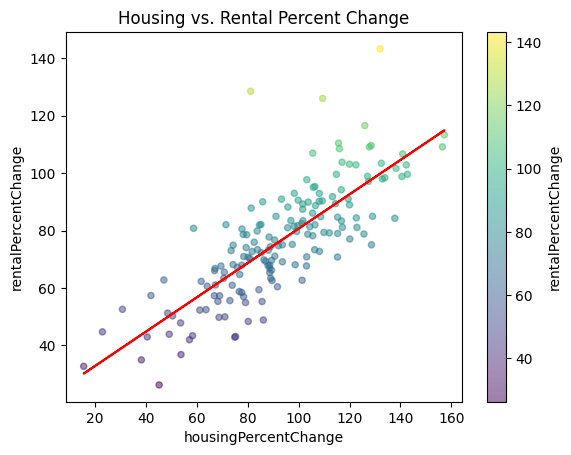

In [82]:
merged_df.plot(kind="scatter", x= 'housingPercentChange' , 
          y='rentalPercentChange',
          c='rentalPercentChange',
          cmap='viridis', alpha=0.5,
          xlabel='housingPercentChange',          
          ylabel='rentalPercentChange',
          title='Housing vs. Rental Percent Change',)
x_values = merged_df["housingPercentChange"] 
y_values = merged_df["rentalPercentChange"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.savefig("../IMAGES/rental_vs_housing_corr.png")